In [68]:
# importing necessary libraries
import numpy
import pandas as pd
import seaborn
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import category_encoders as ce




In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
# loading the dataset
covid = pandas.read_csv('corona_tested_006.csv')


In [71]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [72]:
covid.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [73]:
# defining a function to convert the data
def convert(x):
    if x=='TRUE':
        return 'true'
    elif x==True:
        return 'true'
    elif x=='FALSE' or x==False:
        return 'false'
    else:
        return x

In [74]:
# mapping the function

covid['Cough_symptoms'] = covid['Cough_symptoms'].map(convert)
covid['Fever'] = covid['Fever'].map(convert)
covid['Sore_throat'] = covid['Sore_throat'].map(convert)
covid['Shortness_of_breath'] = covid['Shortness_of_breath'].map(convert)
covid['Headache'] = covid['Headache'].map(convert)

In [75]:
# renaming a column
covid.rename(columns={'Sex':'Gender'},inplace=True)

In [76]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Gender               278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [77]:
covid.replace({'None':numpy.nan},inplace=True)

In [78]:
# Finding the total null values
covid.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Gender                  19563
Known_contact               0
dtype: int64

In [79]:
for i in covid.columns:
    print(f"{i} has",round(covid[i].isnull().sum()*100/covid.shape[0],5),"%")

Ind_ID has 0.0 %
Test_date has 0.0 %
Cough_symptoms has 0.09037 %
Fever has 0.09037 %
Sore_throat has 0.00036 %
Shortness_of_breath has 0.00036 %
Headache has 0.00036 %
Corona has 0.0 %
Age_60_above has 45.65928 %
Gender has 7.01565 %
Known_contact has 0.0 %


In [80]:
# dropping nan rows for columns having less than 1% nan
covid.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache'],axis=0,inplace=True)

In [81]:
# drop age_60_above column 
covid.drop('Age_60_above',axis=1,inplace=True)

In [82]:
covid.replace({'other':numpy.nan},inplace=True)

In [83]:
covid.dropna(subset=['Corona'],axis=0,inplace=True)

In [84]:
# converting the datatype as categorical
for i in covid.columns:
    if i=='Ind_ID' or i == 'Test_date' or i == 'Test_date':
        pass
    else:
        covid[i] = covid[i].astype('category')

In [85]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Gender               255668 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(8), int64(1), object(1)
memory usage: 8.4+ MB


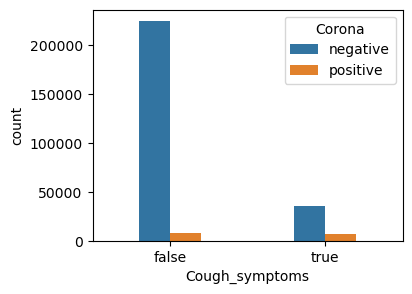

In [86]:
#univatiate analysis

plt.figure(figsize=(4,3))
seaborn.countplot(x='Cough_symptoms',hue='Corona',data=covid,width=0.4)
plt.show()

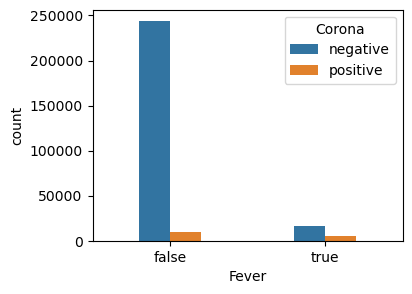

In [87]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Fever',hue='Corona',data=covid,width=0.4)
plt.show()

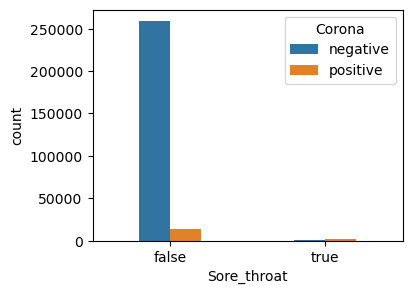

In [88]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Sore_throat',hue='Corona',data=covid,width=0.4)
plt.show()


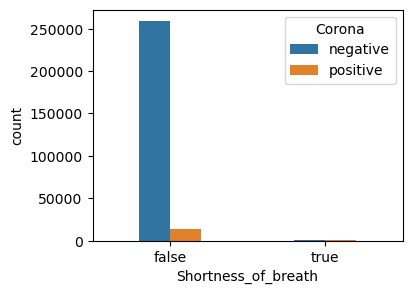

In [89]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Shortness_of_breath',hue='Corona',data=covid,width=0.4)
plt.show()


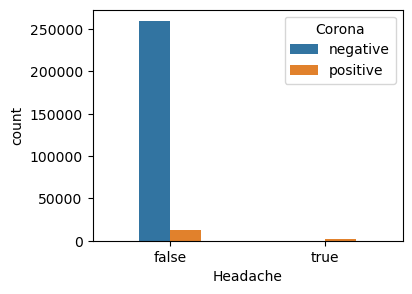

In [90]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Headache',hue='Corona',data=covid,width=0.4)
plt.show()

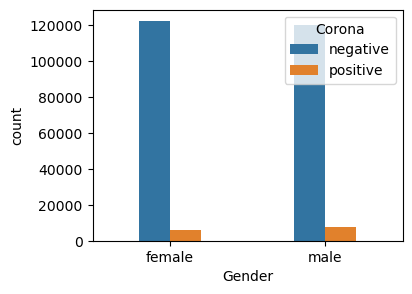

In [91]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Gender',hue='Corona',data=covid,width=0.4)
plt.show()

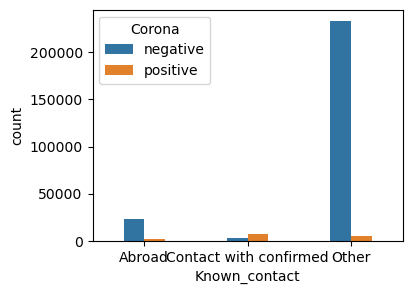

In [92]:
plt.figure(figsize=(4,3))
seaborn.countplot(x='Known_contact',hue='Corona',data=covid,width=0.4)
plt.show()

In [93]:
covid.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Gender                 19034
Known_contact              0
dtype: int64

In [94]:
covid_data=covid.copy(deep=True)

In [95]:
# Encoding
covid_data['Cough_symptoms']=pandas.get_dummies(covid_data['Cough_symptoms'],drop_first=True)
covid_data['Fever']=pandas.get_dummies(covid_data['Fever'],drop_first=True)
covid_data['Sore_throat']=pandas.get_dummies(covid_data['Sore_throat'],drop_first=True)
covid_data['Shortness_of_breath']=pandas.get_dummies(covid_data['Shortness_of_breath'],drop_first=True)
covid_data['Headache']=pandas.get_dummies(covid_data['Headache'],drop_first=True)
covid_data['Corona']=pandas.get_dummies(covid_data['Corona'],drop_first=True)

In [96]:
covid_data['Gender'].replace({'male':0,'female':1},inplace=True)
covid_data['Known_contact'].replace({'Other':2,'Contact with confirmed':1,'Abroad':0},inplace=True)

In [97]:
covid_data.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Gender                 19034
Known_contact              0
dtype: int64

In [98]:
imputed_data = covid_data.copy(deep=True)

In [99]:
# applying KNN imputation
knn=KNNImputer(n_neighbors=5,weights='uniform')
columns=['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache','Gender','Known_contact']
imputed=knn.fit_transform(covid_data[columns])

In [100]:
df=pandas.DataFrame(imputed,columns=columns)

In [101]:
def change(x):
    if x>0.5:
        return 1
    elif x<0.5:
        return 0
    else:
        return x

In [102]:
df['Gender'] = df['Gender'].apply(change)

In [103]:
imputed_data['Gender'].iloc[:] =df['Gender']

In [104]:
imputed_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Gender,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,0,0
1,2,11-03-2020,0,1,0,0,0,1,0,0
2,3,11-03-2020,0,1,0,0,0,1,0,0
3,4,11-03-2020,1,0,0,0,0,0,0,0
4,5,11-03-2020,1,0,0,0,0,0,0,1


In [105]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  uint8   
 3   Fever                274702 non-null  uint8   
 4   Sore_throat          274702 non-null  uint8   
 5   Shortness_of_breath  274702 non-null  uint8   
 6   Headache             274702 non-null  uint8   
 7   Corona               274702 non-null  uint8   
 8   Gender               274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(2), int64(1), object(1), uint8(6)
memory usage: 8.4+ MB


In [106]:
imputed_data['Gender'] = imputed_data['Gender'].astype('uint8') 

In [107]:
final_data = imputed_data.astype('category')

In [108]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  category
 1   Test_date            274702 non-null  category
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Gender               274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(10)
memory usage: 15.7 MB


In [109]:
imputed_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Gender,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,0,0
1,2,11-03-2020,0,1,0,0,0,1,0,0
2,3,11-03-2020,0,1,0,0,0,1,0,0
3,4,11-03-2020,1,0,0,0,0,0,0,0
4,5,11-03-2020,1,0,0,0,0,0,0,1


In [110]:
# separating features and target
features = final_data.drop(['Ind_ID','Test_date','Corona'],axis=1)
target = final_data['Corona']

In [111]:
# chi2 method to select important k best features

selector = SelectKBest(score_func=chi2, k=6)
X_new = selector.fit_transform(features, target)

idxs_selected = selector.get_support(indices=True)

feat_names = features.columns[idxs_selected]

print(feat_names)

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Known_contact'],
      dtype='object')


In [112]:
# splitting train test set
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [113]:
y_test.value_counts()

0    78054
1     4357
Name: Corona, dtype: int64

In [114]:
y_train.value_counts()

0    181954
1     10337
Name: Corona, dtype: int64